# Machine Learning Report 

# Introduction 

### Project Purpose - Getting to know the dataset 

#### The data we are using for the present project is collected from https://www.kaggle.com. It refers to cardiovascular diseases (CVD's), which are a group of disorders of the heart and blood vessels. CVDs are the leading cause of death globally, with the majority of those are due to heart attacks and strokes, while one out of three of the deaths occur prematurely in people under 70 years of age. Obviously, it is about a major problem, which needs to be faced by detecting CVDs as soon as possible. A Machine Learning model could be of great help for this procedure. This dataset provides 11 features that can be used to predict a possible heart disease. Following, we get an intuitive overview for those features.
* Age: patient's age, counted in years 
* Sex: patient's sex, where (M) stands for Male and (F) for Female
* ChestPainType: possible chest pain type, where (TA) stands for Typical Angina, (ATA) for Atypical Angina, (NAP) for Non-Anginal Pain and (ASY) for Asymptomatic
* RestingBP: patient's resting blood pressure, counted in mmHg
* Cholesterol: patient's serum cholesterol, counted in mm/dl
* FastingBS: patient's fasting blood sugar level, where (1) stands for FastingBS > 120 mg/dl and (0) for any other case
* RestingECG: patient's resting electrocardiogram results, where (Normal) is for Normal, (ST) for having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) and (LVH) for showing probable or definite left ventricular hypertrophy by Estes' criteria
* MaxHR: patient's maximum heart rate achieved, which is a numeric value between 60 and 202
* ExerciseAngina: possible exercise-induced angina, where (Y) stands for Yes and (N) for No
* Oldpeak: ST, which is a numeric value measured in depression and refers to patient's electrocadriogram
* ST_Slope: the slope of the peak exercise ST segment, where (Up) stands for upsloping, (Flat) for flat and (Down) for downsloping
* Heart Disease: output class, which brings out if the patient suffers (1) or not (0) from heart disease.


### Importing Libarires

#### Following we import all the libraries that will be used, during the rest of the project.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random 
import pickle
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC                
from sklearn.model_selection import train_test_split, KFold                                  
from sklearn.preprocessing import OneHotEncoder, StandardScaler                          
from sklearn.compose import ColumnTransformer                             
from seaborn import pairplot, catplot
random.seed(13)
pio.renderers.default='notebook'
pd.options.mode.chained_assignment = None

### Importing dataset

#### We are now goint to import and get a first view of the dataset. 

In [7]:
df = pd.read_csv('heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [8]:
#normally 1 stands for heart disease
#for facilitation when reading the confusion matrix we change up to 0 for heart disease

df['HeartDisease'] = np.where(df.HeartDisease == 0, 0, -1)   # 1 to -1
df['HeartDisease'] = np.where(df.HeartDisease == -1, -1, 1)  # 0 to 1
df['HeartDisease'] = np.where(df.HeartDisease == 1, 1, 0)    # -1 to 0

# Data Preproccesing

### Checking for missing values 

#### First step is to locate and discard the missing values. In the present dataset we can make sure there are no missing values at all, by using the following cell.

In [9]:
if df.isna().any().sum() == 0:
    print("There are no missing values.")
else: 
    print("You need to deal with missing values.")

There are no missing values.


### Checking for outliers

#### Nevertheless, missing values existance is not the only possible problem. We, also, need to make sure that the observations don't appear to have any anomalies. A good way to check that, while at the same time we could recognise any possible correlations and patterns between the features, is to visualize them by creacting plots. 

In [10]:
def Pairplot():
  pairplot(df, 
         vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],  
         hue='HeartDisease',
         plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

  catplot(x = 'ChestPainType', y = 'RestingBP', hue = 'HeartDisease', kind = 'box', data = df)
  catplot(x = 'FastingBS', y = 'Cholesterol', hue = 'HeartDisease', kind = 'box', data = df)
  catplot(x = 'RestingECG', y = 'MaxHR', hue = 'HeartDisease', kind = 'box', data = df)
  catplot(x = 'ExerciseAngina', y = 'MaxHR', hue = 'HeartDisease', kind = 'box', data = df)
  catplot(x = 'ST_Slope', y = 'Oldpeak', hue = 'HeartDisease', kind = 'box', data = df)

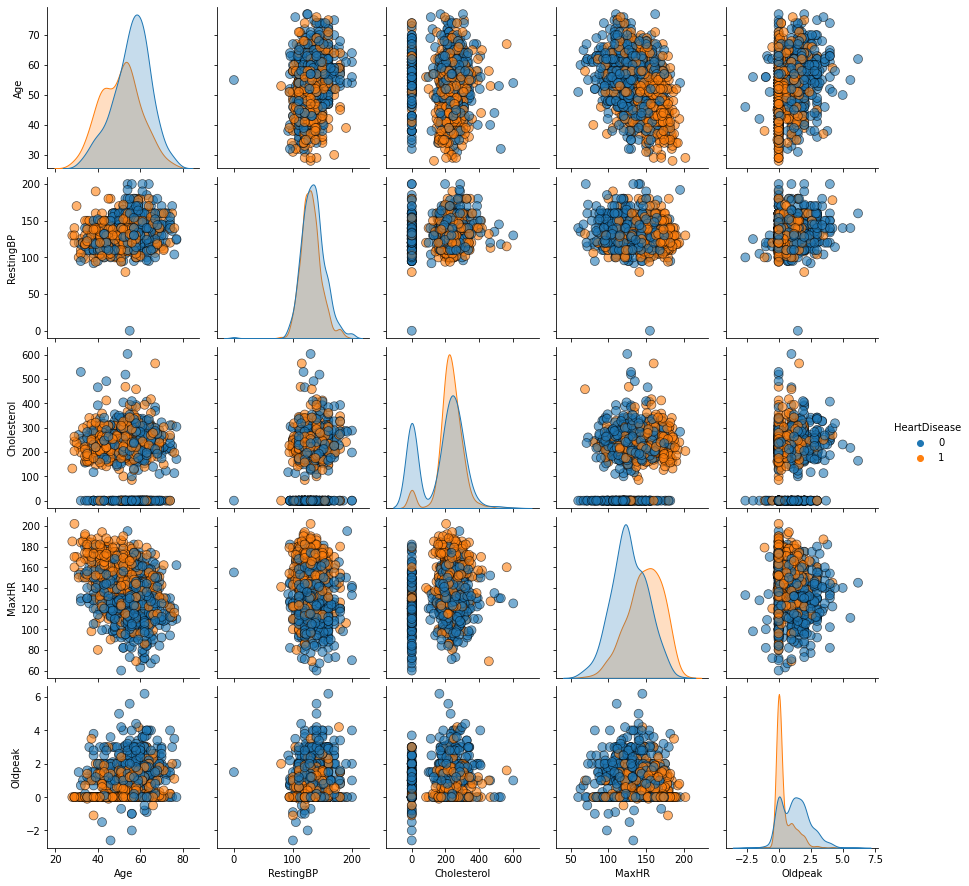

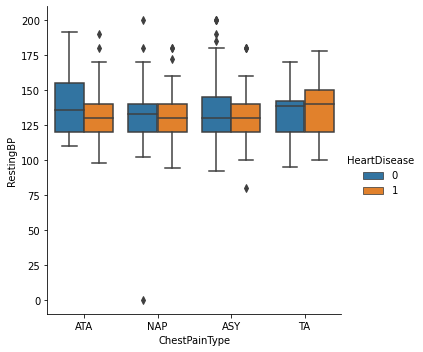

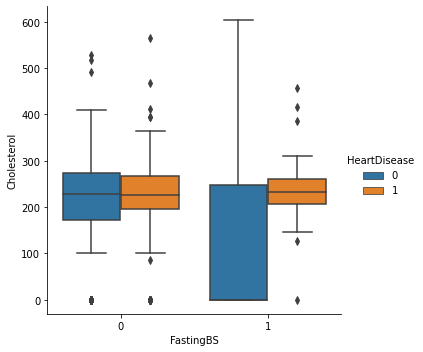

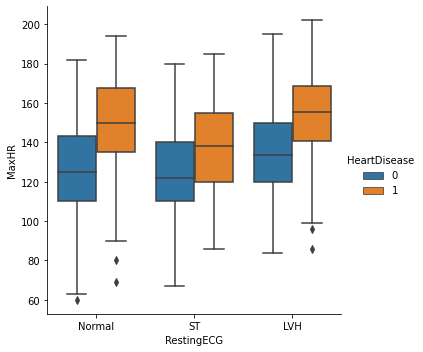

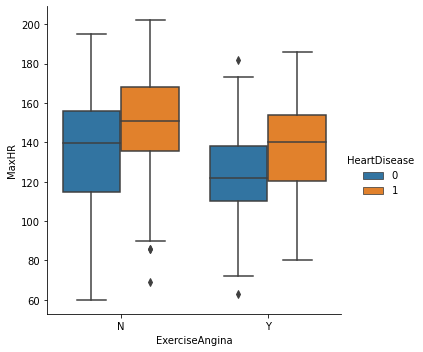

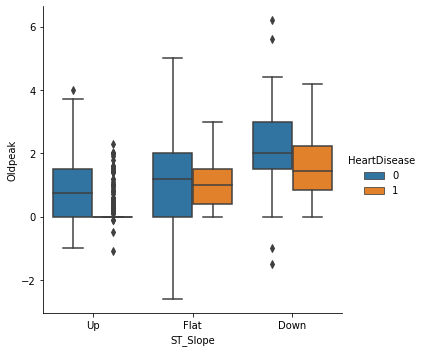

In [25]:
#print plots 
Pairplot()

#### Examining the pairplots, someone could easily notice that features "Cholesterol" and "RestingBP" include zeros in some observations, which do not correspond to normal values. Discarding those observations, the data remaining will be used for the machine learning merhods.

In [11]:
df = df.drop(index=df[df['RestingBP'] == 0].index)
df = df.drop(index=df[df['Cholesterol'] == 0].index)

### Seperating dependent and independent variables

#### With the remaing data, we are going to build a matrix X with the 11 features, which will be used to predict the output class, saved in another matrix y.

In [12]:
X_primary = df.drop(columns = ['HeartDisease']).copy()
y = df['HeartDisease']

### Encoding categorical data

####  Categorical data must be converted to a numerical form, since there exist algorithms which cannot operate on label data directly. However, even those who can deal with that, promise more efficient results by following the encoding procedure. For that purpose, we will apply One-Hot Encoding, which achieves that by replacing each class name by a binary variable, while the uniqueness is being secured. 

In [13]:
X = pd.get_dummies(X_primary, columns=['Sex',
                                       'ChestPainType',
                                       'RestingECG',
                                       'ExerciseAngina',
                                       'ST_Slope'])

### Split into Training and Test set

#### We are, now, going to split the dataset into two subsets, the training and the test set. Training set (80%) will be fitted in the machine learning models and Test (20%) set will be used for evaluating the results. 

In [14]:
X_rem, X_test, y_rem, y_test = train_test_split(X,y, test_size=0.2)

### Feature scaling

#### The last step of the data preproccesing is to apply feature scaling, a technique to standardize the independent features present in the data in a fixed range. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [15]:
#Identify witch columns we want to scale.
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

#Call scaler and fit to train data.
sc = StandardScaler()
sc.fit(X_rem[cols_to_scale])

#Transform train and test set.
X_rem[cols_to_scale] = sc.transform(X_rem[cols_to_scale])
X_test[cols_to_scale] = sc.transform(X_test[cols_to_scale])

# Hyperparameters Tuning

### Purpose

#### Training a model, we are trying to get the best possible results. Nevertheless, an algorithm can never predict 100% correct and there will always be an error. Obviously, dealing with the present health data, we would prefer to restrict this error to the case of predicting falsely healthy patients to suffer from a heart disease, as the doctor's examination would clear the situation, rather predicting that a patient doesn't suffer, when he really does, which could be fatal. 
#### For that purpose, in this section we focus on the recall and precision performance of four ML classification algorithms, over different values for some of their hyperparameters and we extract the ones with the best results.

### Logistic Regression

#### Logistic regression is a predictive analysis algorithm based on the concept of probability. In order to map predicted values to this concept it uses sigmoid function. We expect the classifier to return  an output result based on the probability score when passing inputs through the prediction function.

In [16]:
def log_clf():

  c_values = [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10 , 50, 100, 500, 1000]
  solver_types = ['lbfgs', 'liblinear', 'saga']
  kf = KFold( n_splits=10, shuffle=False, random_state=None )
  column_names = ['c value', 'solver type', 'validation recall', 'validation precision']
  log_df = pd.DataFrame(columns = column_names )
  values_of_c = []
  types_of_solver = []
  valid_rec_values = []
  valid_pre_values = []

  for sol_type in solver_types:
    for c in c_values:
      clf = LogisticRegression(C = c, solver = sol_type, max_iter = 10000)
      valid_rec_score = 0
      valid_pre_score = 0
      for train_index, test_index in kf.split(X_rem):
        X_train, X_valid = X_rem.iloc[train_index], X_rem.iloc[test_index]
        y_train, y_valid = y_rem.iloc[train_index], y_rem.iloc[test_index]
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        valid_rec_score += metrics.recall_score(y_valid, y_valid_pred)/10
        valid_pre_score += metrics.precision_score(y_valid, y_valid_pred)/10
      values_of_c.append(c)
      types_of_solver.append(sol_type)
      valid_rec_values.append(valid_rec_score)
      valid_pre_values.append(valid_pre_score)

  log_df['c value'] = values_of_c
  log_df['solver type'] = types_of_solver
  log_df['validation recall'] = valid_rec_values
  log_df['validation precision'] = valid_pre_values
   
  lbfgs = log_df[log_df['solver type'] == 'lbfgs']
  liblinear = log_df[log_df['solver type'] == 'liblinear']
  saga = log_df[log_df['solver type'] == 'saga']
    
  fig = make_subplots(rows=2, cols=2, subplot_titles=("lbfgs", "liblinear", "saga"))

  fig.add_trace(go.Scatter(x=lbfgs['c value'], y=lbfgs['validation recall'], name = 'recall',
                        line = dict(color='royalblue')), row = 1, col =1)

  fig.add_trace(go.Scatter(x=lbfgs['c value'], y=lbfgs['validation precision'], name = 'precision',
                        line = dict(color='red')),row =1, col =1)

  fig.add_trace(go.Scatter(x=liblinear['c value'], y=liblinear['validation recall'], 
                        line = dict(color='royalblue')), row = 1, col =2)

  fig.add_trace(go.Scatter(x=liblinear['c value'], y=liblinear['validation precision'],
                        line = dict(color='red')),row =1, col =2)

  fig.add_trace(go.Scatter(x=saga['c value'], y=saga['validation recall'],
                        line = dict(color='royalblue')), row = 2, col =1)

  fig.add_trace(go.Scatter(x=saga['c value'], y=saga['validation precision'],
                        line = dict(color='red')),row =2, col =1)

  fig.update_xaxes(type="log")
    
  fig.update_layout(title = 'Logistic Regression')

  fig.show()

In [17]:
#plotting recall - precision over different hyperparameters values 
log_clf()    

In [18]:
#saving the results for the final evaluation
log_solver_type = 'saga'
log_c_value = 0.01

### K Nearest Neighbors

#### KNN algorithm expresses the idea of similarity with some pretty easy mathematics. It calculates the distance between points on a graph,  assuming that similar things exist in close proximity. In other words, it returns the output prediction based on the hypothesis that similar things are near to each other. 

In [19]:
def knn_clf():
    
  nn_values = [] 
  i =5 
  while i<=40:
    nn_values.append(i)
    i = i+2
  weight_types = ['uniform', 'distance']
  kf = KFold( n_splits=10, shuffle=False, random_state=None )
  column_names = ['nearest neighbors needed', 'weight type', 'validation recall', 'validation precision']
  knn_df = pd.DataFrame(columns = column_names )
  values_of_n = []
  types_of_weights = []
  valid_rec_values = []
  valid_pre_values = []

  for w in weight_types:
    for n in nn_values:
      clf = KNeighborsClassifier(n_neighbors = n, weights = w)
      valid_rec_score = 0
      valid_pre_score = 0
      for train_index, test_index in kf.split(X_rem):
        X_train, X_valid = X_rem.iloc[train_index], X_rem.iloc[test_index]
        y_train, y_valid = y_rem.iloc[train_index], y_rem.iloc[test_index]
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        valid_rec_score += metrics.recall_score(y_valid, y_valid_pred)/10
        valid_pre_score += metrics.precision_score(y_valid, y_valid_pred)/10
      values_of_n.append(n)
      types_of_weights.append(w)
      valid_rec_values.append(valid_rec_score)
      valid_pre_values.append(valid_pre_score)

  knn_df['nearest neighbors needed'] = values_of_n
  knn_df['weight type'] = types_of_weights
  knn_df['validation recall'] = valid_rec_values
  knn_df['validation precision'] = valid_pre_values
    
  uniform = knn_df[knn_df['weight type'] == 'uniform']
  distance = knn_df[knn_df['weight type'] == 'distance']
    
  fig = make_subplots(rows=1, cols=2, subplot_titles=("uniform", "distance"))

  fig.add_trace(go.Scatter(x=uniform['nearest neighbors needed'], y=uniform['validation recall'], name = 'recall',
                        line = dict(color='royalblue')), row = 1, col =1)

  fig.add_trace(go.Scatter(x=uniform['nearest neighbors needed'], y=uniform['validation precision'], name = 'precision',
                        line = dict(color='red')),row =1, col =1)

  fig.add_trace(go.Scatter(x=distance['nearest neighbors needed'], y=distance['validation recall'], 
                        line = dict(color='royalblue')), row = 1, col =2)

  fig.add_trace(go.Scatter(x=distance['nearest neighbors needed'], y=distance['validation precision'],
                        line = dict(color='red')),row =1, col =2)
    
  fig.update_layout(title = 'K Nearest Neighbors')

  fig.show()

In [20]:
#plotting recall - precision over different hyperparameters values 
knn_clf()

In [21]:
#saving the results for the final evaluation
knn_weight_type = 'distance'
knn_n_value = 25

### Decision Tree

#### A Decision tree is a flowchart like tree structure, where¨
* each internal node denotes a test on an attribute
* each branch represents an outcome of the test
* each leaf node (terminal node) holds a class label

In [22]:
def tree_clf():
  
  max_depth_values = []
  i = 4
  while i<=15:
    max_depth_values.append(i)
    i = i+1
  criterion_types = ['gini', 'entropy']
  kf = KFold( n_splits=10, shuffle=False, random_state=None )
  column_names = ['maximum depth', 'criterion type', 'validation recall', 'validation precision']
  tree_df = pd.DataFrame(columns = column_names )
  values_of_depth = []
  types_of_criterion = []
  valid_rec_values = []
  valid_pre_values = []

  for crit in criterion_types:
    for depth in max_depth_values:
      clf = DecisionTreeClassifier(criterion = crit, max_depth = depth)
      valid_rec_score = 0
      valid_pre_score = 0
      for train_index, test_index in kf.split(X_rem):
        X_train, X_valid = X_rem.iloc[train_index], X_rem.iloc[test_index]
        y_train, y_valid = y_rem.iloc[train_index], y_rem.iloc[test_index]
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        valid_rec_score += metrics.recall_score(y_valid, y_valid_pred)/10
        valid_pre_score += metrics.precision_score(y_valid, y_valid_pred)/10
      values_of_depth.append(depth)
      types_of_criterion.append(crit)
      valid_rec_values.append(valid_rec_score)
      valid_pre_values.append(valid_pre_score)

  tree_df['maximum depth'] = values_of_depth
  tree_df['criterion type'] = types_of_criterion
  tree_df['validation recall'] = valid_rec_values
  tree_df['validation precision'] = valid_pre_values
    
  gini = tree_df[tree_df['criterion type'] == 'gini']
  entropy = tree_df[tree_df['criterion type'] == 'entropy']
    
  fig = make_subplots(rows=1, cols=2, subplot_titles=("gini", "entropy"))

  fig.add_trace(go.Scatter(x=gini['maximum depth'], y=gini['validation recall'], name = 'recall',
                        line = dict(color='royalblue')), row = 1, col =1)

  fig.add_trace(go.Scatter(x=gini['maximum depth'], y=gini['validation precision'], name = 'precision',
                        line = dict(color='red')),row =1, col =1)

  fig.add_trace(go.Scatter(x=entropy['maximum depth'], y=entropy['validation recall'], 
                        line = dict(color='royalblue')), row = 1, col =2)

  fig.add_trace(go.Scatter(x=entropy['maximum depth'], y=entropy['validation precision'],
                        line = dict(color='red')),row =1, col =2)
    
  fig.update_layout(title = 'Decision Tree')

  fig.show()

In [23]:
#plotting recall - precision over different hyperparameters values 
tree_clf()

In [24]:
#saving the results for the final evaluation
tree_max_depth = 4
tree_criterion_type = 'gini'

### Support Vector Machine 

#### The objective of the support vector algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Nevertheless, to separate the two classes of data points there exist many possible hyperpanes. SVM finds the one that has the maximum margin distance, so that furure data points can be classifies with more confidence.

In [25]:
def svm_clf():

  c_values = [0.05, 0.1, 0.5, 1, 5, 10 , 50, 100, 500, 1000]
  kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
  kf = KFold( n_splits=10, shuffle=False, random_state=None )
  column_names = ['c value', 'kernel type', 'validation recall', 'validation precision']
  svm_df = pd.DataFrame(columns = column_names )
  values_of_c = []
  types_of_kernel = []
  valid_rec_values = []
  valid_pre_values = []

  for kern_type in kernel_types:
    for c in c_values:
      clf = SVC(C = c, kernel = kern_type)
      valid_rec_score = 0
      valid_pre_score = 0
      for train_index, test_index in kf.split(X_rem):
        X_train, X_valid = X_rem.iloc[train_index], X_rem.iloc[test_index]
        y_train, y_valid = y_rem.iloc[train_index], y_rem.iloc[test_index]
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        valid_rec_score += metrics.recall_score(y_valid, y_valid_pred)/10
        valid_pre_score += metrics.precision_score(y_valid, y_valid_pred)/10
      values_of_c.append(c)
      types_of_kernel.append(kern_type)
      valid_rec_values.append(valid_rec_score)
      valid_pre_values.append(valid_pre_score)

  svm_df['c value'] = values_of_c
  svm_df['kernel type'] = types_of_kernel
  svm_df['validation recall'] = valid_rec_values
  svm_df['validation precision'] = valid_pre_values
    
  linear = svm_df[svm_df['kernel type'] == 'linear']
  poly = svm_df[svm_df['kernel type'] == 'poly']
  rbf = svm_df[svm_df['kernel type'] == 'rbf']
  sigmoid = svm_df[svm_df['kernel type'] == 'sigmoid']
    
  fig = make_subplots(rows=2, cols=2, subplot_titles=('linear', 'poly', 'rbf', 'sigmoid'))

  fig.add_trace(go.Scatter(x=linear['c value'], y=linear['validation recall'], name = 'recall',
                        line = dict(color='royalblue')), row = 1, col =1)

  fig.add_trace(go.Scatter(x=linear['c value'], y=linear['validation precision'], name = 'precision',
                        line = dict(color='red')),row =1, col =1)

  fig.add_trace(go.Scatter(x=poly['c value'], y=poly['validation recall'], name = 'recall',
                        line = dict(color='royalblue')), row = 1, col =2)

  fig.add_trace(go.Scatter(x=poly['c value'], y=poly['validation precision'], name = 'precision',
                        line = dict(color='red')),row =1, col =2)

  fig.add_trace(go.Scatter(x=rbf['c value'], y=rbf['validation recall'], name = 'recall',
                        line = dict(color='royalblue')), row = 2, col =1)

  fig.add_trace(go.Scatter(x=rbf['c value'], y=rbf['validation precision'], name = 'precision',
                        line = dict(color='red')),row =2, col =1)

  fig.add_trace(go.Scatter(x=sigmoid['c value'], y=sigmoid['validation recall'], name = 'recall',
                        line = dict(color='royalblue')), row = 2, col =2)

  fig.add_trace(go.Scatter(x=sigmoid['c value'], y=sigmoid['validation precision'], name = 'precision',
                        line = dict(color='red')),row =2, col =2)

  fig.update_xaxes(type="log")
    
  fig.update_layout(title = 'Support Vector Machine')

  fig.show()
  

In [26]:
#plotting recall - precision over different hyperparameters values 
svm_clf()

In [27]:
#saving the results for the final evaluation
svm_c_value = 0.5
svm_kernel_type = 'poly'

# Compare Algorithms

#### At this moment, we have tuned the hyperparametes of each algorithm trying to achieve the biggest possible recall, while at the same time precision is kept in high levels. Final step is to compare the algorithms with each other. For that comparison we will use F1-Scores, a metric which combines the precision and recall performance and accuracy as a final overview.

In [28]:
def clf_comp():
    
    names = ['accuracy', 'F1-score']
    comp_df = pd.DataFrame(columns = names)
    accuracy_scores = []
    f1_scores = []
    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    
    log_clf = LogisticRegression(C = log_c_value, solver = log_solver_type, max_iter = 10000)
    log_acc = 0
    log_f1 = 0
    for train_index, test_index in kf.split(X_rem):
        X_train, X_valid = X_rem.iloc[train_index], X_rem.iloc[test_index]
        y_train, y_valid = y_rem.iloc[train_index], y_rem.iloc[test_index]
        log_clf.fit(X_train, y_train)
        y_valid_pred = log_clf.predict(X_valid)
        log_acc +=metrics.accuracy_score(y_valid, y_valid_pred)/10
        log_f1 += metrics.f1_score(y_valid, y_valid_pred)/10
    accuracy_scores.append(log_acc)
    f1_scores.append(log_f1)
    
    knn_clf = KNeighborsClassifier(n_neighbors = knn_n_value, weights = knn_weight_type)
    knn_acc = 0
    knn_f1 = 0
    for train_index, test_index in kf.split(X_rem):
        X_train, X_valid = X_rem.iloc[train_index], X_rem.iloc[test_index]
        y_train, y_valid = y_rem.iloc[train_index], y_rem.iloc[test_index]
        knn_clf.fit(X_train, y_train)
        y_valid_pred = knn_clf.predict(X_valid)
        knn_acc += metrics.accuracy_score(y_valid, y_valid_pred)/10
        knn_f1 += metrics.f1_score(y_valid, y_valid_pred)/10
    accuracy_scores.append(knn_acc)
    f1_scores.append(knn_f1)
    
    tree_clf = DecisionTreeClassifier(criterion = tree_criterion_type, max_depth = tree_max_depth)
    tree_acc = 0
    tree_f1 = 0
    for train_index, test_index in kf.split(X_rem):
        X_train, X_valid = X_rem.iloc[train_index], X_rem.iloc[test_index]
        y_train, y_valid = y_rem.iloc[train_index], y_rem.iloc[test_index]
        tree_clf.fit(X_train, y_train)
        y_valid_pred = tree_clf.predict(X_valid)
        tree_acc += metrics.accuracy_score(y_valid, y_valid_pred)/10
        tree_f1 += metrics.f1_score(y_valid, y_valid_pred)/10    
    accuracy_scores.append(tree_acc)
    f1_scores.append(tree_f1)
    
    svm_clf = SVC(C = svm_c_value , kernel = svm_kernel_type)
    svm_acc = 0
    svm_f1 = 0
    for train_index, test_index in kf.split(X_rem):
        X_train, X_valid = X_rem.iloc[train_index], X_rem.iloc[test_index]
        y_train, y_valid = y_rem.iloc[train_index], y_rem.iloc[test_index]
        svm_clf.fit(X_train, y_train)
        y_valid_pred = svm_clf.predict(X_valid)
        svm_acc += metrics.accuracy_score(y_valid, y_valid_pred)/10
        svm_f1 += metrics.f1_score(y_valid, y_valid_pred)/10 
    accuracy_scores.append(svm_acc)
    f1_scores.append(svm_f1)
        
    comp_df['accuracy'] = accuracy_scores
    comp_df['F1-score'] = f1_scores
    
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy", "F1-Score"))
    
    fig.add_trace(go.Bar(x = ['Log', 'K-NN', 'Decision Tree', 'SVM'], y = comp_df['accuracy'])
                         , row =1, col =1)
    
    fig.add_trace(go.Bar(x = ['Log', 'K-NN', 'Decision Tree', 'SVM'], y = comp_df['F1-score'])
                         , row =1, col =2)
    
    fig.update_layout(title = 'Final Comparison')
    
    fig.show()

In [29]:
#plot final comparison algorithms over F1-Scores and Accuracies
clf_comp()

#### Barplots make clear that SVM performance is better in both accuracy and F1-Score. Therefore we will keep that model for the web-app predictions. Before that, we have kept the test set for the final expected results of the selected algorithm.

In [30]:
#final regressor chosen: SVM
final_clf = SVC(C = svm_c_value , kernel = svm_kernel_type)

In [32]:
#fit the regresson to the whole train set 
final_clf.fit(X_rem, y_rem)

#make predictions to the test set 
y_pred = final_clf.predict(X_test)
evaluate_accuracy = metrics.accuracy_score(y_test, y_pred)

#print the expected accuracy 
print("Exprected overall accuracy is "+str(evaluate_accuracy))

Exprected overall accuracy is 0.9066666666666666


#### Last step is to finally fit the SVM model in the whole dataset, as the evaluations and tests are finally done, so we get as much information as possible. 

In [33]:
#define the app regressor 
app_regressor = SVC(C = svm_c_value, kernel = svm_kernel_type)

#fit the app regressor to the whole dataset
app_regressor.fit(X, y)

SVC(C=0.5, kernel='poly')

#### Finally we save the chosen regressor in a pkl file, in order to reload it in the web-app implementation.

In [34]:
#saving the classifier 
app_regressor = {"model": app_regressor}
with open('saved_clf.pkl', 'wb') as file:
    pickle.dump(app_regressor, file)

In [35]:
#commands you will need to load the classifier 
with open('saved_clf.pkl', 'rb') as file:
    clf = pickle.load(file)

clf_loaded = clf['model']
clf_loaded

SVC(C=0.5, kernel='poly')